In [4]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


In [6]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# Split the dataset (70:30 split with random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the model
model = DecisionTreeClassifier(random_state=1)

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion options
    'splitter': ['best', 'random'],  # Splitter options
    'min_samples_leaf': [2, 4, 6, 8, 10],  # Min samples per leaf
    'max_depth': [3, 4, 5, 6],  # Max depth options
}

# Set up grid search with 4-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, n_jobs=-1)

# Train the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)

# Print results
print("Best Parameters:", best_params)
print(f"Test Set Score (Accuracy): {test_score:.4f}")
print(f"Best max_depth: {best_params['max_depth']}")
print(f"Best min_samples_leaf: {best_params['min_samples_leaf']}")

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'best'}
Test Set Score (Accuracy): 0.9074
Best max_depth: 4
Best min_samples_leaf: 2


Score on Training Set: 0.5032
Score on Test Set: 0.2188


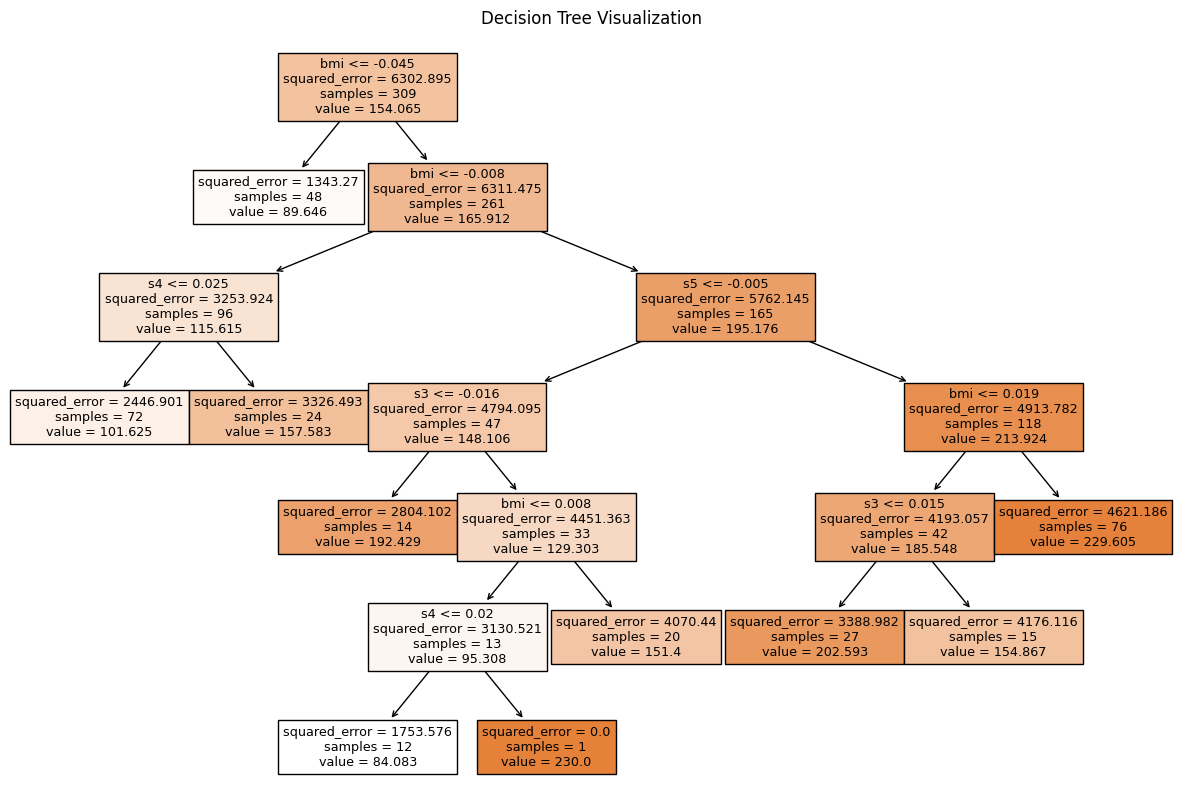

Squared Error at the Root Node: 6302.8955
Ratio of Samples in Left Child Node to Right Child Node at Root: 0.1839


In [7]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the dataset (70:30 split with random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the model
model = DecisionTreeRegressor(criterion='squared_error',
                               splitter='random',
                               max_leaf_nodes=10,
                               random_state=1)

# Train the model
model.fit(X_train, y_train)

# Compute the score on training data and test data
train_score = model.score(X_train, y_train)  # R^2 score on training set
test_score = model.score(X_test, y_test)  # R^2 score on test set

# Print results
print(f"Score on Training Set: {train_score:.4f}")
print(f"Score on Test Set: {test_score:.4f}")

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=data.feature_names)
plt.title("Decision Tree Visualization")
plt.show()

# Extract squared error at the root node (i.e., node 0)
# Squared error at the root node is found in model.tree_.impurity[0]
squared_error_root = model.tree_.impurity[0]
print(f"Squared Error at the Root Node: {squared_error_root:.4f}")

# Calculate the ratio of samples in the left and right child nodes of the root
left_samples = model.tree_.n_node_samples[model.tree_.children_left[0]]  # Left child of root
right_samples = model.tree_.n_node_samples[model.tree_.children_right[0]]  # Right child of root
sample_ratio = left_samples / right_samples
print(f"Ratio of Samples in Left Child Node to Right Child Node at Root: {sample_ratio:.4f}")


In [8]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the dataset (70:30 split with random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the model with max_depth=4 and random_state=1
model = DecisionTreeRegressor(max_depth=4, random_state=1)

# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_features': [4, 5, 6, 'sqrt', 'log2'],
    'ccp_alpha': [0.001, 0.01, 0.02, 0.05]  # Cost-complexity pruning parameter
}

# Set up grid search with 4-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Compute the score on the test set (R^2 score)
test_score = best_model.score(X_test, y_test)

# Get the best ccp_alpha and max_features after GridSearchCV
best_ccp_alpha = best_params['ccp_alpha']
best_max_features = best_params['max_features']

# Print results
print(f"Test Set Score (R^2): {test_score:.4f}")
print(f"Best ccp_alpha: {best_ccp_alpha}")
print(f"Best max_features: {best_max_features}")

Test Set Score (R^2): 0.2277
Best ccp_alpha: 0.001
Best max_features: 5
